This notebook explores the concepts relating to unsupervised learning in Python through clustering.

Supervised vs unsupervised learning:

Supervised learning consists of training a model through labelled data. The user tells the model what information to glean from the data. The data set is labelled with examples of inputs and resulting outputs, which are used to train the model. The model can then use labelled input data to predict further outcomes.

Unsupervised learning uses a model to glean information from a data set. The user does not know if the underlying data is related in any way and instead has the model find any patterns or features that can be used for categorization. This data can then be labelled and used to train a model for future analysis of similar datasets.

For our purposes, we will be looking at the k-means clustering algorithm and its applications in python.

Kmeans:

The K-means process seeks to split data into a number of clusters (determined by the user of the program). 

To do this, K initial centroids are determined (either randomly or using an algorithm such as kmeans++) and then the data points are assigned to a single one of these centroids (same thing as saying they are assigned to clusters) based on the minimum of the Square Euclidean Distance between each data point and the centroids. New centroids are then calculated based on the current clustering and then the process is repeated until the tolerance is reached (determined by the user). This process is also called minimizing the inertia.

Aside (kmeans++):

In python, kmeans++ is the typical algorithm that is used to determine the initial centroids used for the kmeans clustering algorithm. This algorithm uses a complex probability distribution to calculate the probability distribution for each data point to a randomly selected set of centroids (done prior to running kmeans). The end goal of this distribution is to maximize the probability that the new resulting set of centroids will be close to the actual values. This allows us to initialize our K-means algorithm with a set of centroids close to the final value and saves on computing time. 

Note: kmeans++ works best with a smaller number of centroids and on a data set that cannot easily be solved into clusters on just initialization alone.

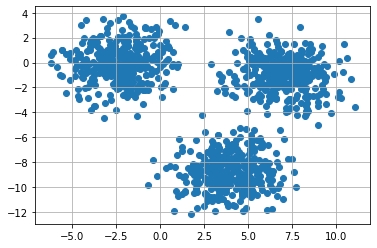

In [1]:
#Lets do an example of kmeans using a random dataset

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

nb_samples = 1000
X, _ = make_blobs(n_samples=nb_samples, n_features=5, centers=3, cluster_std=1.5, random_state = 500)

#Make the figure
figure = plt.Figure()
ax1 = plt.subplot()
ax1.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

We see from the above example that there are three expected clusters that we want K-means to group the data into. We want K-means to minimize the error in grouping especially between clusters which are close together.

In [2]:
#Now do K-means

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(X)
print(km.fit(X))

#Note: We are using the KMeans fit method. This method fits the data to the kmeans algorithm and create the cluster centers (centroids).
#It does not, however, assign centroid (cluster) numbers to each data point.

print(km.cluster_centers_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[ 6.96466873 -0.95913527 -3.69065555 -2.74183315 -1.03310711]
 [ 3.96398598 -8.7040914   3.31866926  1.24933335 -8.36639806]
 [-2.25157716 -0.05537078 -3.51349533 -3.33899947 -2.76686712]]


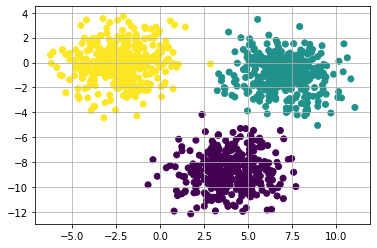

In [3]:
#To generate a plot of our data, we need to use the fit_predict method in the KMeans module.
#This runs the data through the KMeans module, creates the centroids, and then assigns each data point
#to a centroid.

y_pred = km.fit_predict(X)
#Make the figure
figure = plt.Figure()
ax1 = plt.subplot()
ax1.scatter(X[:,0], X[:,1], c=y_pred)
plt.grid(True)
plt.show()

We see that the program optimized the clusters and appropriately grouped the data based on the closest members!

This method works in this situation since the Squared Euclidean distance that the method runs on expects the clusters to be convex. If the data was circular in nature, then the clustering algorithm would most likely fail (fail meaning grouping incorrectly.

Finding the Optimal Number of Clusters: 

This is the downfall for K-means. How do you go about choosing an optimal number of clusters? If you choose too few, then there could be groups that contain elements that could be split into further groups, and if you choose too many, you can have too many groups to work with. 

There are multiple methods to help choose the optimal number of clusters and we will discuss a few here:

Optimizing the Inertia (elbow method);
Silhouette Score;
Calinski-Harabasz Index;
Gap Statistic;
Classifiability Index;

Elbow Method:

We will start with the elbow method. This method is based on the assumption that an appropriate number of clusters will produce a small inertia and that the value of inertia reaches a minimum when the number of clusters equals the number of samples. This isn't possible to look for, so we plot the inertias for 1 to 10 clusters and see if it forms the shape of an arm (it should). Then, look for where the elbow of the arm would be, and that is the optimal number of clusters. Sometimes, the elbow can be found over a range of values, so further analysis must be used in these cases.

To start, let's load in the data for the 1979-2018 years that we used for our climate study in the Northeast U.S.

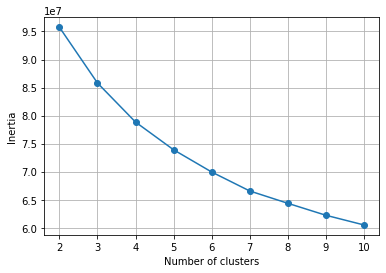

In [4]:
#Load in the dataset
import pandas as pd

df = pd.read_excel('testdata.xlsx')

#drop the first column as it isn't needed
df = df.drop(columns=['Unnamed: 0'])

#Convert to a numpy array for use
X = df.to_numpy()

#The elbow method applied to the above K-means example
nb_clusters = [2,3,4,5,6,7,8,9,10]
inertias = []
for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

#Make the figure
figure = plt.Figure()
ax1 = plt.subplot()
ax1.plot(nb_clusters,inertias,marker='o')
ax1.set_xticks(nb_clusters)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
plt.grid(True)
plt.show()

We don't really see a well-defined elbow here. That could be a suggestion that k-means isn't a good fit for this dataset or that we need to look further into the clustering since this is a complex dataset. Our data isn't really consistent of well-defined blobs, but there is a hint of it in the data.

Silhouette Score: 

The silhouette score tries to determine the number of clusters that produce a subdivision of the dataset into dense blocks that are well separated from each other. This means that we want to minimize the distance between the points and their respective centroids while also maximizing the distance between points in a centroid from all other points in all other centroids. 

To do this, you need to calculate the Euclidean Distance for each point within each centroid and find the average intracluster distance for each centroid. Then find the average of the nearest cluster distance for each point in each centroid. 

Then the silhouette = (avg. nearest cluster distance - avg. intracluster distance)/ (max{avg. intracluster  distance, avg. nearest cluster distance})

In essence, you are showing that the distance between the furthest point in each cluster and its corresponding centroid (the maximum intracluster distance) is less than the distance between any two elements of any two clusters (the nearest cluster distance).

The value for the silhouette score will be between -1 and 1:

A value close to 1 is good, meaning that the avg. intracluster distance is much less than the nearest cluster distance.
A value close to 0 means that the distance is almost null and there's overlap in some of the clusters. This means that more clusters are needed for the solution.
A value close to -1 means the sample has been assigned to the wrong cluster.

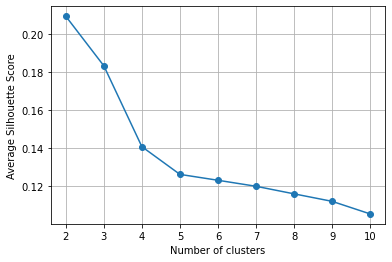

In [5]:
#Calculate the silhouette score for the above case
from sklearn.metrics import silhouette_score

avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X, Y))

#Make the figure
figure = plt.Figure()
ax1 = plt.subplot()
ax1.plot(nb_clusters,avg_silhouettes,marker='o')
ax1.set_xticks(nb_clusters)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()    

As we can see, the highest silhouette score is for the 2 cluster solution with another spike at the 7 cluster solution. Let's look at the silhouette plots themselves to get a better idea at what this means

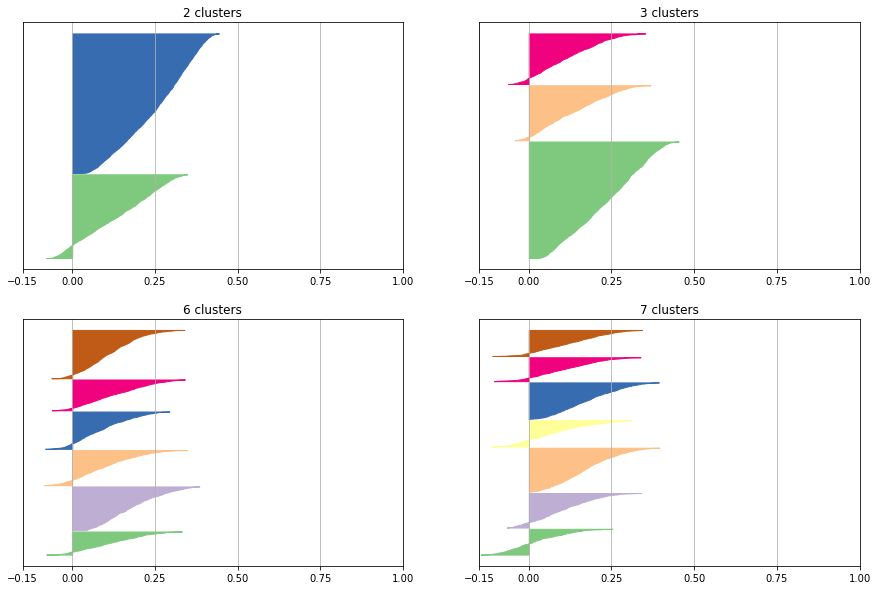

In [6]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(15,10))

nb_clusters = [2,3,6,7]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    
    silhouette_values = silhouette_samples(X, Y)
    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    ax[mapping[i]].grid(True)
    y_lower = 20
    
    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()
        y_upper = y_lower + ct_values.shape[0]
        
        color = cm.Accent(float(t)/n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, ct_values, facecolor=color, edgecolor=color)
        y_lower = y_upper + 20
        

Above we see the output for the silhouettes for the 2, 3, 6, and 7 cluster solutions. We see that the two cluster solution shows good spacing between the clusters, however one cluster is much larger than the other. For the 6 and 7 cluster solutions, all the clusters see good spacing between them and are around the same size. The 3 cluster solution has two clusters that are almost triangular in shape, meaning that there is too much space between them and the other clusters.

Calinski-Harabasz index:

This is a another measure of dense vs well-separated clusters. The index is based on the ratio between the inter-cluster dispersion and the intra-cluster dispersion. We want to find a cluster that minimizes the intracluster dispersion while also maximizing the intercluster dispersion; meaning, we want a cluster that has dense agglomerates that are well-separated.

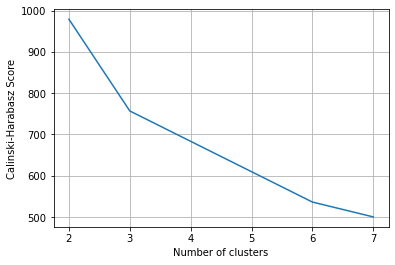

In [7]:
#Compute and graph the Calinski-Harabasz index
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
km = KMeans(n_clusters=n)
Y = km.fit_predict(X)

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    ch_scores.append(calinski_harabasz_score(X, Y))
    
#Make the figure
figure = plt.Figure()
ax1 = plt.subplot()
ax1.plot(nb_clusters,ch_scores)

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Calinski-Harabasz Score')
plt.grid(True)
plt.show()    

The highest value for this index is located at the 2 cluster solution.

Gap Statistic:

Next, let's look at the gap statistic. The goal of the statistic is to compare the inertia of our K-means clustering to K-means clustering run using reference datasets created from a random sample of our original dataset. If we look at the inertia plots for each, we see the typical elbow shape for our actual data and a slow decrease in inertia (looks more linear) for the reference dataset. 

The gap statistic looks to maximize the gap in between the inertia lines at each cluster. Usually we expect the highest gap to be around where the elbow occurs.

c:\programdata\anaconda2\envs\kmeans\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
c:\programdata\anaconda2\envs\kmeans\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
c:\programdata\anaconda2\envs\kmeans\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
c:\programdata\anaconda2\envs\kmeans\lib\site-packages\ipykernel_launcher.py:55: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
c:\programdata\anaconda2\envs\kmeans\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
c:\programdata\anaconda2\envs\kmeans\lib\site-packages\ipykernel_la

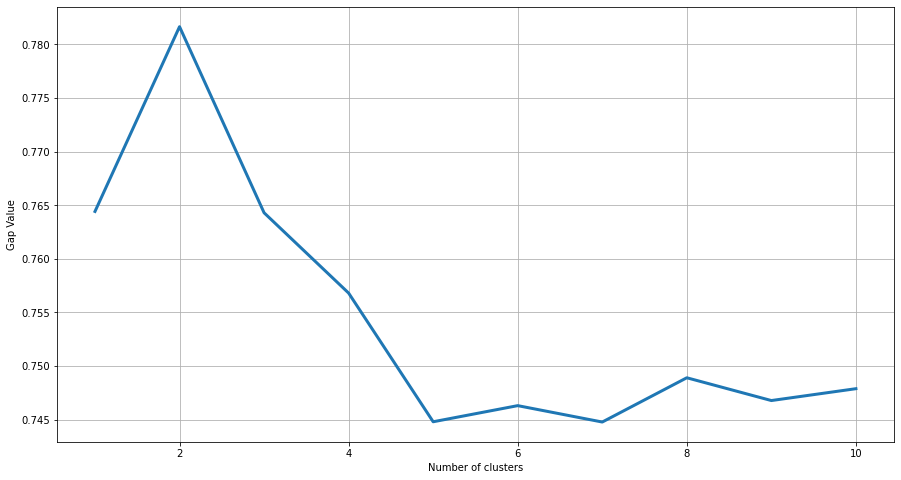

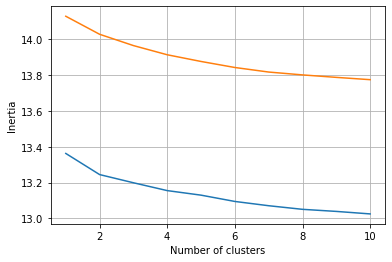

In [8]:
import scipy

import scipy.cluster.vq

import scipy.spatial.distance

dst = scipy.spatial.distance.euclidean

 

def gap(data, refs=None, nrefs=20, ks=range(1,11)):

    """

    Compute the Gap statistic for an nxm dataset in data.

 

    Either give a precomputed set of reference distributions in refs as an (n,m,k) scipy array,

    or state the number k of reference distributions in nrefs for automatic generation with a

    uniformed distribution within the bounding box of data.

 

    Give the list of k-values for which you want to compute the statistic in ks.

    """

    shape = data.shape

    if refs==None:

        tops = data.max(axis=0)
        bots = data.min(axis=0)

        dists = scipy.matrix(scipy.diag(tops-bots))



 

        rands = scipy.random.random_sample(size=(shape[0],shape[1],nrefs))

        for i in range(nrefs):

            rands[:,:,i] = rands[:,:,i]*dists+bots

    else:
        rands = refs

    gaps = scipy.zeros((len(ks),))
    ref_inert = scipy.zeros((len(ks),))
    on_inert = scipy.zeros((len(ks),))

    for (i,k) in enumerate(ks):

        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)

        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

 

        refdisps = scipy.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):

            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)

            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])

            gaps[i] = scipy.log(scipy.mean(refdisps))-scipy.log(disp)
            ref_inert[i] = (scipy.log(scipy.mean(refdisps)))
            on_inert[i] = (scipy.log(disp))

    return gaps, ref_inert,on_inert

gap, reference_inertia, ondata_inertia = gap(X)
#Make the figure
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.plot(np.arange(1,len(gap)+1,1), gap, linewidth=3)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Gap Value')
ax1.grid()
plt.show()    
    
#Make the figure
figure = plt.Figure()
ax1 = plt.subplot()
ax1.plot(np.arange(1,len(gap)+1,1),ondata_inertia)
ax1.plot(np.arange(1,len(gap)+1,1),reference_inertia)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
plt.grid(True)
plt.show()

Classifiability Index:

Finally we will look at the Classifiability Index method of determining an optimal number of clusters. This method is used by Michaelangeli et al (1995) and Moron et al (2002). A quick rundown is as follows:

K-means was then run as follows for each value (K=1:max clusters): 
1. Each cluster initially has ns centroids which are randomly assigned. 

2. Data is assigned to each centroid based on where the sum of the Squared Euclidean distance between each variable and the centroid is the minimum. 

3. The centroids are recalculated based on this new clustering arrangement. 

4. The process repeats using the new centroids. This iterates up to the total number of simulations until the sum of the squared distances stops changing. The k-means program was run 100 times with this data to produce 100 different partitions (P) each which contain a set of variables for each cluster (Pijk, where i is the total number of partitions, j is the total number of clusters, and k is the number of centroids ns). 

5. For each partition, Pijk, the ACC was calculated between each cluster of that partition, j = 1:K, and all clusters of all other partitions Qlmn (where l != i and m = 1:K). This produces an array of values with the rows representing the number of clusters in Qlmn and the column representing the partition Ql. 

6. For each column in this array, take the max value and average them all together. This gives us a representative correlation of a single cluster in Pijk to all other clusters in Qlmn. 

7. Place this value into an array with the rows representing the cluster number in Pijk and the columns representing the partition number Pi. Repeat this process for all clusters of all partitions. 

8. Take the mean of each column of this new array and find the max value. That value corresponds to the partition which has the best representative correlation to all the other partitions and is equal to the CI value for the cluster K.

Let's take a look at what this looks like:

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10


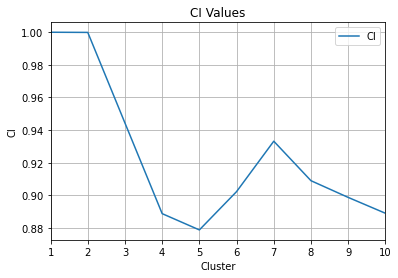

In [9]:
#Classifiability Index

#Import stuff
import os
import numpy as np
from netCDF4 import Dataset
import xarray as xr
from sklearn.cluster import KMeans
import pandas as pd

def kmeans_ci(X=None, stand=None, weighting=None, prop=None, nclus=None, nsim=None):
    # [CI,K]=kmeans_ci(X,stand,weighting,prop,nclus,nsim);
    #
    # This function makes a k-means clustering of the rows of the input matrix
    # 'X' and computes the classifiability index for a partition of the
    # rows of the input matrix 'X' using a dynamical clustering algorithm
    # (k-means) into 'nclus' clusters. There are 'nsim' different partitions
    # that are compared. The clustering is performed in EOF-space taking the
    # leading EOF accouting for 'prop' proprtion of the total variance. The
    # algorithm computes for each cluster the mean anomaly correlation between
    # its centroid and the other clusters.
    #
    # Input
    # 'X': input matrix to be classified (rows are classified)
    # 'stand': option for standardising the matrix (by columns) = 'm' for just
    # removing the long-term mean and ='s' for standardising to zero mean and
    # unit variance. if stand is empty, the matrix is not standardized.
    # 'weighting': vector for weighting the columns of X.
    # 'prop': scalar giving the proportion of variance to be retained in the
    # EOF pre-filtering step. if prop is empty, no EOF-prefiltering is done
    # 'nclus': number of cluster
    # 'nsim' : number of different partition simulated (typically nsim= 50-100)
    #
    # Outpurs
    # 'CI': scalar giving the classifiability index
    # 'K': row vector giving the cluster for each row of input matrix 'X'.
    #
    # ref. Michelangeli et al., JAS, 1995 (1230-1246)
    #
    # Vincent Moron
    # June 2006
    #
    # modification
    # March 2010: the random seed is changed into "stream=RandStream('mrg32k3a')"
    # September 2010: "nclus" could be a vector instead of a scalar to test in
    # a loop different number of clusters

    if stand != None:
        nan_mean = np.nanmean(X, axis=0)
        nan_std = np.nanstd(X, axis=0, ddof=1)
        X = (X - nan_mean) / nan_std
        X = np.nan_to_num(X)
    r = X.shape[0]
    c = X.shape[1]
    nclus = nclus
    nsim = nsim

    if prop != None:
        U,S,V = np.linalg.svd(np.around(X,4))
        #Note that S returns as diag(S) and V needs to be transposed (V.T)
        s = S ** 2
        sc = s/np.sum(s,axis=0)
        a= np.nonzero(np.cumsum(sc,axis=0)>prop)[0]
        a=a[0]+1
        Snew = np.zeros(X.shape)
        np.fill_diagonal(Snew,np.around(S,4))
        PC = np.around(U[:,0:a],4) @ np.around(Snew[0:a,0:a],4)
    else:
        PC = X
    Kens = np.ones((PC.shape[0], nclus, nsim))
    K = np.zeros(PC.shape[0])
    CI = np.zeros(1)
    for NC in range(0, 1, 1):  # NC=1:length(nclus)
        # clear MC mean_cluster mean_cluster2 k ACC ACCmax part
        mean_cluster = np.zeros((nclus, c))
        ACCmax = np.zeros((nclus, nsim))
        k = np.zeros((PC.shape[0], nsim))
        MC = np.zeros(((nclus) * c, nsim))
        for i in range(nsim):  # i=1:nsim;
            k[:, i] = KMeans(n_clusters=nclus, init='k-means++', n_init=1, max_iter=10000).fit_predict(PC)  # k(:,i)=kmeans(PC,nclus(NC),'Maxiter',1000,'EmptyAction','singleton');
            for j in range(nclus):  # j=1:nclus(NC);
                lj = len(np.nonzero(k[:, i] == j)[0])
                if lj > 1:
                    mean_cluster[j, :] = np.mean(PC[np.nonzero(k[:, i] == j)[0], :],axis=0)
                else:
                    mean_cluster[j, :] = PC[k[:, i] == j]
            nan_mean = np.nanmean(mean_cluster.T, axis=0)
            nan_std = np.nanstd(mean_cluster.T, axis=0, ddof=1)
            mean_cluster2 = (mean_cluster.T - nan_mean) / nan_std
            mean_cluster = np.zeros((nclus, c))
            MC[:, i] = mean_cluster2.flatten('F')  # centroids stored in MC matrix
        Kens[:, NC - 1, :] = k
        for i in range(nclus):
            for j in range(nsim):
                sample1 = MC[(i * c):(i + 1) * c, j]
                a = np.nonzero(j != np.arange(0, nsim))[0]
                sample2 = MC[:, a].reshape(c, (nsim - 1) * nclus,
                                           order='F').copy()
                ind = np.isnan(sample1)
                sample1[ind] = 0
                ind = np.isnan(sample2)
                sample2[ind] = 0
                ACC = (1 / (c - 1)) * sample1.conj().T @ sample2
                ACC = ACC.reshape(nclus, nsim - 1, order='F').copy()
                ACCmax[i, j] = np.mean(ACC.max(0))  # considering the mean instead the min
        part = np.nonzero(np.mean(ACCmax, axis=0) == np.max(np.mean(ACCmax, axis=0)))[
            0]
        CI[NC] = np.mean(ACCmax)  # Classification index for the partition ton 'nclus' clusters
        if len(part) > 1: part = part[0]
        K[:] = np.squeeze(k[:, part])  # best partition that maximize the ACC with the nsim-1 other partitions
    return K, CI

k_over = np.zeros((3640,10))
ci_over = np.zeros(10)
for n in range(1, 11,1):
    print('k=%d' % n)
    k, ci = kmeans_ci(X,None,None,None,n,100)
    k_over[:,n-1] = np.squeeze(k)
    ci_over[n-1] = ci
#Now save to a netcdf file
k_df = pd.DataFrame(k_over,columns=['k=1','k=2','k=3','k=4','k=5','k=6','k=7','k=8','k=9','k=10'])
ci_df = pd.DataFrame(ci_over,columns=['CI'])
k_df['CI'] =ci_df
CI = ci_df
CI.index = np.arange(1,len(CI)+1)
ax = CI.plot()
ax.set_ylabel('CI')
ax.set_xlabel('Cluster')
ax.set_title('CI Values')
ax.set_xlim(1,10)
plt.grid(True)
plt.show()


From the above values, we see relatively high CI values overall, with a peak at 7 clusters and a min at 5 clusters. 2 Clusters also sees a peak, but we consider this an artifact of the data based on the previous analyses that we did above which all showed 2 clusters as being a prominent solution. Since we are looking at many data points and complex data underlying these points, a 2 cluster solution would be ineffective to explain all the nuances in the data set. Now we can better analyze this by creating a random red noise data from the dataset and running it through the same CI process. Then we can take the 975th and 25th values of CI to make a 95% confidence interval (Monte Carlo Method)

In [ ]:
#Red noise data test for CI


import numpy as np

def copy(y=None,N=None):
#% [X]=copy(Y,N);
#%
#% This function copies 'N' times a matrix 'Y'.
#%
#% Input
#% 'X' : matrix of real number
#% 'N' : scalar integer giving the number of copies
#%
#% Output
#% 'Y' : matrix 'X' copied 'N' times (the copy is done in row)
#%
#% Vincent Moron
#% July 1997
#% Ported to Python by David Coe
#% UMass Lowell
#% February 2020
#
    NR = 1
    NC = len(y)
    x=y.conj().T
    x=x.flatten('F')
    x=(x[:,None])@(np.ones((1,N)))
    x=x.reshape(NC,NR*N,order='F')
    x=x.conj().T

    return x

def scale_mean_var(X,Y):

# % [Z]=scale_mean_var(X,Y);
# %
# % This function scales the columns of the input matrix 'X', so that its
# % mean and variance match the ones of the input matrix 'Y'.
# %
# % Input
# % 'X' : matrix of real number to be scaled
# % 'Y' : matrix of real number used in the scaling
# %
# % Output
# % 'Z' : matrix of real number (the mean and variance of the columns of 'Z'
# % are equal to the ones of 'Y'
# %
# % Vincent Moron
# % Nov 2005
# % Ported to Python by David Coe
# % UMass Lowell
# % February 2020


    nr, nc = X.shape
    my=np.mean(Y,axis=0)
    sy=np.std(Y, axis=0, ddof=1)
    mx=np.mean(X,axis=0)
    sx=np.std(X, axis=0, ddof=1)
    Z=(X@np.diag(sy/sx))
    dm=np.mean(Z,axis=0)-my
    dm=np.ones((nr,1))*dm
    Z=Z-dm
    return Z


def ar1rand(X = None, nsim = None):
    '''
        Y=ar1rand(X,nsim);

         Red-noise random simulation of 'nsim' time series of the
         same length as the input vector 'X' and having the same
         one-order auto-correlation and mean and variance as 'X'

        Vincent Moron
         June 2006
         Ported to Python by
         David Coe
         UMass Lowell
         February 2020

    '''
    X = X.flatten('F')
    n = len(X)
    c = np.corrcoef(X[0:n - 1], X[1: n])[0,1]
    d = 1-c
    Y = np.zeros((n,nsim))
    Y[0,:] = np.random.randn(1, nsim)
    Z = np.random.randn(n, nsim)
    Z = scale_mean_var(Z, copy(X[1:n].conj().T,nsim).conj().T)
    for j in range(1,n):
        Y[j,:]=(Y[j - 1,:] * c)+(Z[j,:] * d)
    Y = scale_mean_var(Y, copy(X.conj().T,nsim).conj().T)
    return Y

rsims = np.zeros((X.shape[0],X.shape[1],100))
#We will reduce nc through EOF
for i in range(X.shape[1]):
    p = ar1rand(X[:,i],100)
    rsims[:,i,:] = p
#Now save the data to a file called random.nc for future use if necessary to rerun
rsims_xr = xr.DataArray(rsims, dims=('days','variables','nsims'), name='rsims')

# #Now we will run kmeans with the red noise data for each cluster nsim times
CIcis = np.zeros((10,100))
CIci = np.zeros((1,100))
citop = np.zeros((10,1))
cibot = np.zeros((10,1))
for i in range(1,11,1):
    for j in range(100):
        sim = np.squeeze(rsims[:,:, j])
        k, CIci[0, j] = kmeans_ci(sim, None, None, None, i, 100)
    CIcis[i-1,:]=CIci
    cisort = np.sort(CIcis[i-1,:])
    citop[i-1,0] = cisort[int(.90 * 100)] # one - sided 90 % confidence interval
    cibot[i-1,0] = cisort[0]
ax = CI.plot()
ax.set_ylabel('CI')
ax.set_xlabel('Cluster')
ax.set_title('Classifiability Index')
ax.set_xlim(1, 10)
for a in range(10):
    ax.plot((a+1,a+1),(citop[a,0],cibot[a,0]), 'red')
plt.grid()
plt.show()
#Now fill in the area
ax = CI.plot()
ax.set_ylabel('CI')
ax.set_xlabel('Cluster')
ax.set_title('Classifiability Index')
ax.set_xlim(1, 10)
for a in range(10):
    ax.plot((a+1,a+1),(citop[a,0],cibot[a,0]), 'red')
x = np.arange(1,11,1)
ax.fill_between(x,np.squeeze(citop),np.squeeze(cibot),color='silver')
plt.grid()
plt.show()

Looking at the output, any part of the blue line that lies outside of the gray shading is considered significant. If the blue line is above it, then the clustering is a good fit for the data. If it falls inside of the gray shading, it means the clustering can happen due to random chance, so it is not a good fit.